Clustering Basado en densidad:

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X, y = make_blobs(n_samples = 1500, centers = [[4, 3], [2, -1], [-1, 4]], cluster_std = 0.5)
X = StandardScaler().fit_transform(X)

Modelar:

In [3]:
modelo = DBSCAN(eps = 0.3, min_samples = 7).fit(X)
labels = modelo.labels_

In [4]:
msk = np.zeros_like(labels, dtype = bool)
msk[modelo.core_sample_indices_] = True

In [5]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

labels_u = set(labels)

Graficar:

In [6]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels_u)))

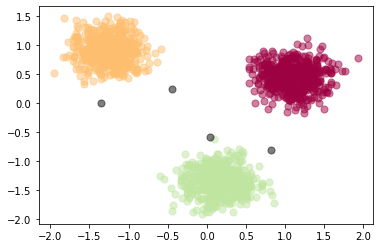

In [7]:
for k, col in zip(labels_u, colors):
    if k == -1:
        col = 'k'
    
    class_msk = (labels == k)
    
    x = X[class_msk & msk]
    plt.scatter(x[:, 0], x[:, 1], c = [col], s = 50, marker = u'o', alpha = 0.5)
    
    x = X[class_msk & ~msk]
    plt.scatter(x[:, 0], x[:, 1], c = [col], s = 50, marker = u'o', alpha = 0.5)